# Plotting the data

First, import the necessary packages
(skip this step if they're already downloaded)

In [1]:
import sys
!{sys.executable} -m pip install --quiet wnutils
!{sys.executable} -m pip install --quiet urllib3

Now import the package to check for and retrieve the data:

In [2]:
import os.path
from os import path
import urllib.request

If the data do not exist, retrieve and unpack them by running the code block below:

In [3]:
if not path.exists('my_output1.xml'):
    url = 'http://nucnet-tools.sourceforge.net/data_pub/tutorials/wnutils/2018-06-09/wnutils_tutorials_data.tar.gz'
    filename = 'wnutils_tutorials_data.tar.gz'
    urllib.request.urlretrieve(url,filename)
    !tar zxvf wnutils_tutorials_data.tar.gz

If you have read in the various data from a webnucleo file, you can plot them using matplotlib. For example, to plot the abundance of Z=28 nuclei in *my_output1.xml* as a function of time, you can type in Python:

In [4]:
import matplotlib.pyplot as plt
import wnutils.xml as wx
my_xml = wx.Xml('my_output1.xml')
props = my_xml.get_properties_as_floats(['time'])
yz = my_xml.get_abundances_vs_nucleon_number(nucleon='z')
plt.plot(props['time'],yz[:,28])
plt.xscale('log')
plt.xlim([1.e-14,1.])
plt.ylim([0.,0.0014])
plt.xlabel('time (s)')
plt.ylabel('Y(28)')
plt.show()

<Figure size 640x480 with 1 Axes>

Of course you can also write a Python file (called, say, my_plot.py) with the above lines and execute it by typing *python my_plot.py*.

While it is always possible to make such plots with data read in with *wnutils* routines, we have written several plotting methods for commonly made plots. The rest of this tutorial demonstrates how to use these methods.

## Setting RcParams 

All the plotting methods accept RcParams as keywords. These can be entered as a key and value pair or as a dictionary of **[matplotlib.RcParams](https://matplotlib.org/api/matplotlib_configuration_api.html#matplotlib.RcParams)**. You can print the list of parameters (and their default values) that can be set by running:

In [5]:
import wnutils.base as wnb
wb = wnb.Base()
wb.list_rcParams()

KeysView(RcParams({'_internal.classic_mode': False,
          'agg.path.chunksize': 0,
          'animation.avconv_args': [],
          'animation.avconv_path': 'avconv',
          'animation.bitrate': -1,
          'animation.codec': 'h264',
          'animation.convert_args': [],
          'animation.convert_path': 'convert',
          'animation.embed_limit': 20.0,
          'animation.ffmpeg_args': [],
          'animation.ffmpeg_path': 'ffmpeg',
          'animation.frame_format': 'png',
          'animation.html': 'none',
          'animation.html_args': [],
          'animation.writer': 'ffmpeg',
          'axes.autolimit_mode': 'data',
          'axes.axisbelow': 'line',
          'axes.edgecolor': 'black',
          'axes.facecolor': 'white',
          'axes.formatter.limits': [-7, 7],
          'axes.formatter.min_exponent': 0,
          'axes.formatter.offset_threshold': 4,
          'axes.formatter.use_locale': False,
          'axes.formatter.use_mathtext': False,
        

/opt/local/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/_collections_abc.py:705: MatplotlibDeprecationWarning: 
The examples.directory rcparam was deprecated in Matplotlib 3.0 and will be removed in 3.2. In the future, examples will be found relative to the 'datapath' directory.
  return '{0.__class__.__name__}({0._mapping!r})'.format(self)


Since the Base class is inherited by the other wnutils classes, the *list_rcParams()* method is available from any class instance.

For the purposes of this tutorial, define a dictionary of parameters by running:

In [6]:
my_params = {'lines.linewidth': 2, 'font.size': 14}

## Setting plot parameters 

The plotting methods accept *plotParams* as a keyword. The object passed in through the keyword is a **[dict](https://docs.python.org/3/library/stdtypes.html#dict)** of **[matplotlib.pyplot.plot](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.plot.html#matplotlib.pyplot.plot)** optional keyword arguments. The dictionary values govern the lines drawn on the plot. For example, calling a *wnutils* plotting routine with:

In [7]:
params = {'color':'black'}

and then *plotParams = params* in the plotting routine can be thought of as plotting with the command:

In [8]:
import matplotlib.pyplot as plt
#plt.plot(x, y, color='black')

When the plotting routine creates multiple curves on the same plot, the object passed in through *plotParams* is a **[list](https://docs.python.org/3/library/stdtypes.html#list)** of dictionaries of **[matplotlib.pyplot.plot](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.plot.html#matplotlib.pyplot.plot)** optional keyword arguments. Each dictionary in the list corresponds to a curve on the plot.

## Setting plot methods 

The plotting routines also accept keywords giving **[matplotlib.pyplot](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.html#module-matplotlib.pyplot)** methods and their arguments. In such a case, the keyword is the method, and the value is the argument to the method. For example, calling a *wnutils* plotting routine with the keyword *xlabel = ‘time (s)’* is equivalent to:

Text(0.5, 0, 'time (s)')

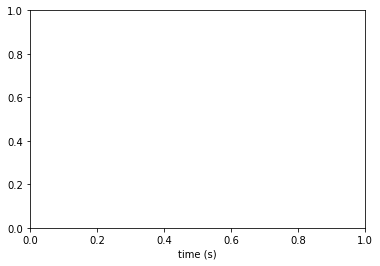

In [9]:
import matplotlib.pyplot as plt
plt.xlabel('time (s)')

These can be entered directly or as a dictionary. If the method takes an argument and optional keywords, enter these as a tuple. For example, calling a *wnutils* plotting routine with the keyword *savefig = (‘my_fig.png’, {‘bbox_inches’: ‘tight’})* is equivalent to:

In [10]:
plt.savefig('my_fig.png', bbox_inches = 'tight')

<Figure size 432x288 with 0 Axes>

The tuple must have two elements–the argument and the dictionary of optional keyword arguments.

## XML 

To make graphs from XML files, first import the namespace:

In [11]:
import wnutils.xml as wx

Then create an object for each file. For example, type:

In [12]:
my_xml = wx.Xml('my_output1.xml')

## Plot properties against each other for the zones 

You can plot properties in the zones in an XML file against each other. For example, to plot *t9* vs. *time*:

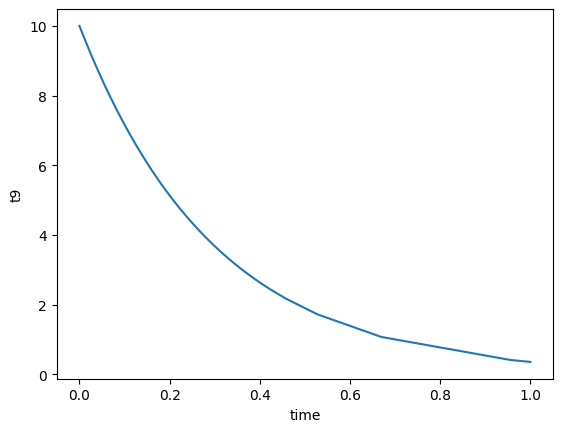

In [13]:
my_xml.plot_property_vs_property( 'time', 't9' )

Now apply class methods to the plot. For example:

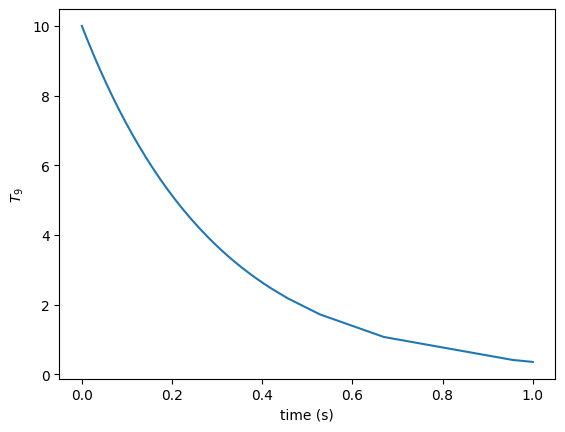

In [14]:
my_xml.plot_property_vs_property( 'time', 't9', xlabel = 'time (s)', ylabel = '$T_9$' )

You can equivalently do this by defining the method keywords in a dictionary and calling that. To do so:

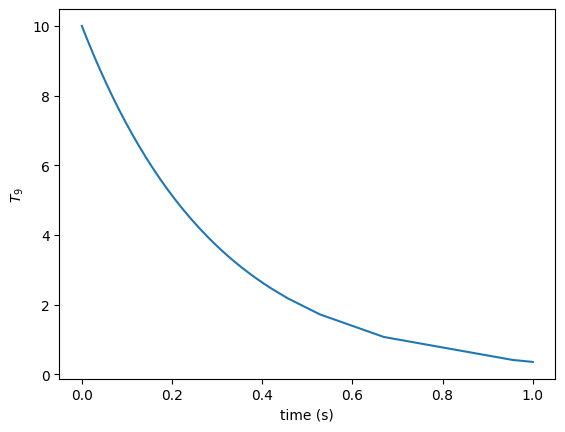

In [15]:
kw = {'xlabel':'time (s)', 'ylabel':'$T_9$'}
my_xml.plot_property_vs_property('time', 't9', **kw)

You can also do this with both procedures. For example:

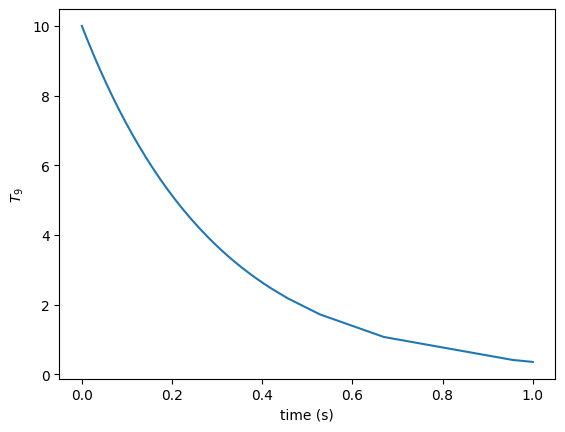

In [16]:
kw2 = {'xlabel':'time (s)'}
my_xml.plot_property_vs_property('time', 't9', ylabel = '$T_9$', **kw2)

You can call with the RcParams previously defined by:

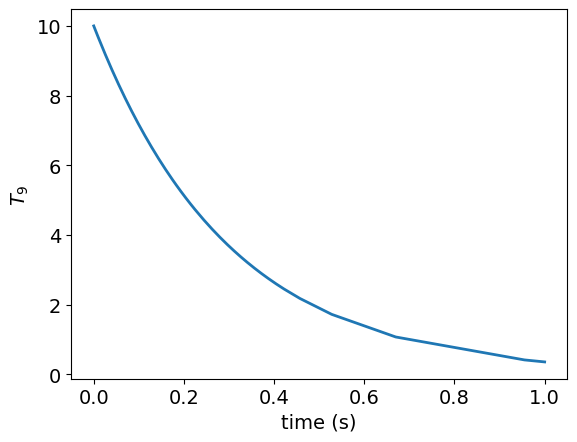

In [17]:
my_xml.plot_property_vs_property('time', 't9', rcParams=my_params, **kw)

You can also call the the plotParams keyword by:

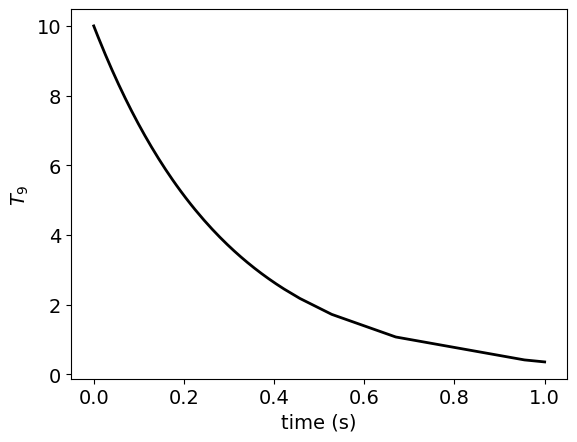

In [18]:
my_xml.plot_property_vs_property('time', 't9', rcParams=my_params, plotParams={'color':'black'}, **kw)

## Plot mass fractions against a property 

You can plot mass fractions of species against a property (typically the time or temperature). For example, to plot the mass fractions of he4 and fe58 versus time:

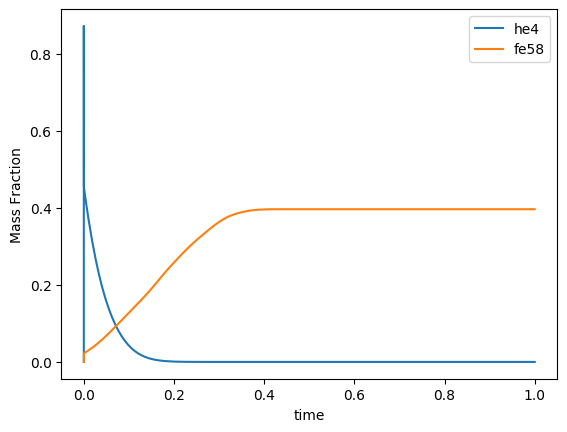

In [19]:
my_xml.plot_mass_fractions_vs_property( 'time', ['he4','fe58'] )

You can add appropriate keywords. For example:

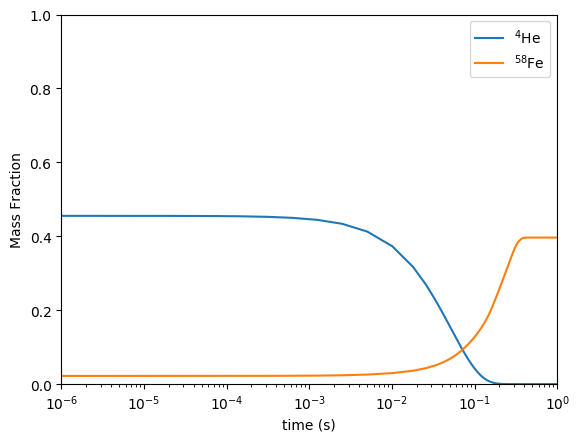

In [20]:
my_xml.plot_mass_fractions_vs_property( 'time', ['he4','fe58'], use_latex_names=True, xlabel = 'time (s)', xlim=[1.e-6,1], xscale = 'log', ylim=[0,1])

By setting the *use_latex_names* keyword to true, species names appear as a superscript mass number in front of the element name. You can of course also use the RcParams:

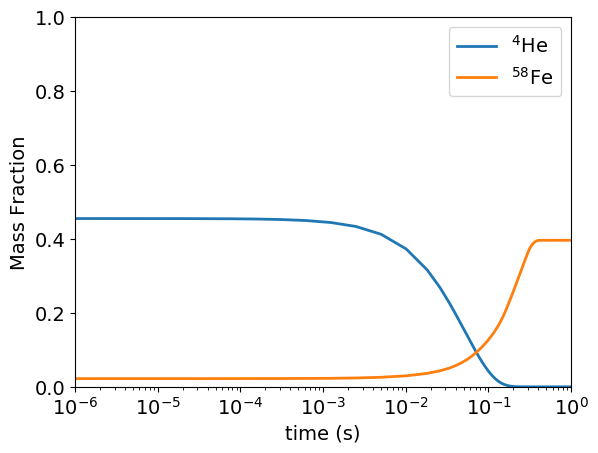

In [21]:
my_xml.plot_mass_fractions_vs_property( 'time', ['he4','fe58'], use_latex_names=True, xlabel = 'time (s)', xlim=[1.e-6,1], xscale = 'log', ylim=[0,1], rcParams=my_params)

If you want to plot the mass fraction for a single species, be sure to enter that species as a list of one element:

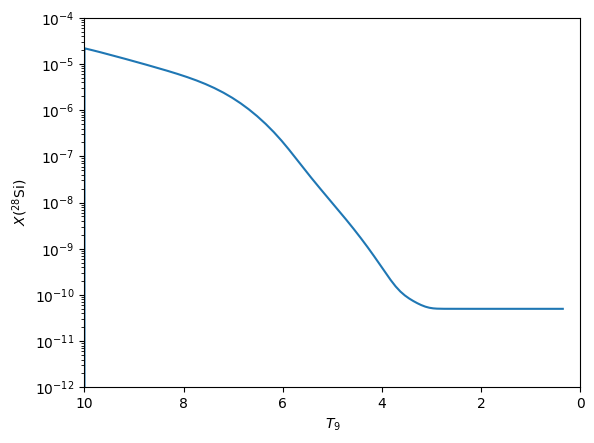

In [22]:
kw3 = {'use_latex_names': True, 'xlabel': '$T_9$', 'xlim': [10,0]}
my_xml.plot_mass_fractions_vs_property( 't9', ['si28'], **kw3, ylim=[1.e-12,1.e-4], yscale = 'log')

Finally, note that you can define the species to plot as a list that you then enter into the plot command. For example:

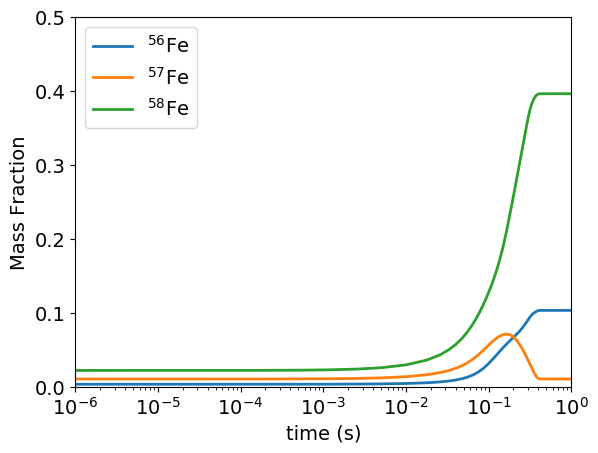

In [23]:
nuclides_list = ['fe56','fe57','fe58']
my_xml.plot_mass_fractions_vs_property( 'time', nuclides_list, use_latex_names=True, xlabel = 'time (s)', xlim=[1.e-6,1], xscale = 'log', ylim=[0,0.5], rcParams=my_params)

You can generate the list from an XPath expression. For example:

In [24]:
nuclides = my_xml.get_nuclide_data(nuc_xpath='[z = 26 and (a - z >= 30 and a - z <= 32)]')
nuclides_list = []
for nuclide in nuclides:
    nuclides_list.append(nuclide)

print(nuclides_list)

['fe56', 'fe57', 'fe58']


Now you can use that list in the plotting routine.

## Plot abundances versus nucleon number 

To plot the summed abundances over mass number A in the last zone:

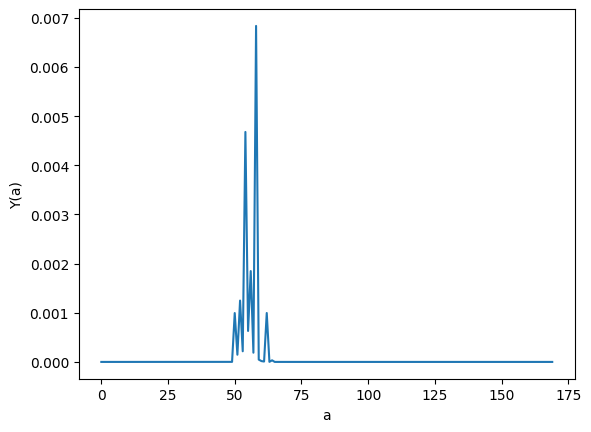

In [25]:
my_xml.plot_abundances_vs_nucleon_number()

To dress that up, try:

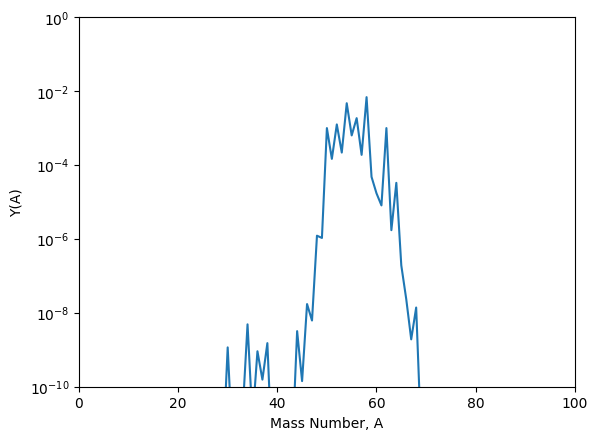

In [26]:
my_xml.plot_abundances_vs_nucleon_number(xlim = [0,100], ylim = [1.e-10,1], yscale='log', xlabel = 'Mass Number, A', ylabel = 'Y(A)')

Use keywords to plot against atomic number (Z) or neutron number (N) or to plot against a different time step (zone), using an XPath expression. For example, to plot elemental abundances in the 20th step:

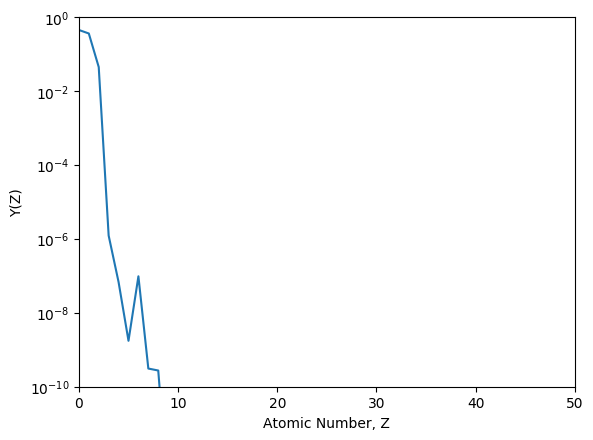

In [27]:
my_xml.plot_abundances_vs_nucleon_number(nucleon='z', zone_xpath='[position() = 20]', xlim = [0,50], ylim = [1.e-10,1], yscale='log', xlabel = 'Atomic Number, Z', ylabel = 'Y(Z)')

To add a title giving the conditions at that step:

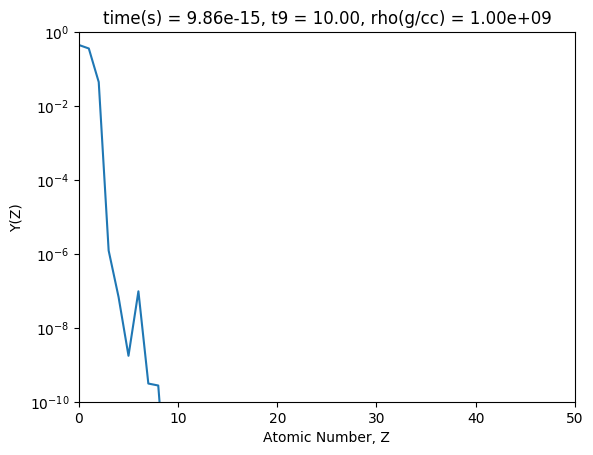

In [28]:
props = my_xml.get_properties_as_floats( ['time','t9','rho'] )
title_str = 'time(s) = {0:.2e}, t9 = {1:.2f}, rho(g/cc) = {2:.2e}'.format(props['time'][19], props['t9'][19], props['rho'][19])
my_xml.plot_abundances_vs_nucleon_number(nucleon='z', zone_xpath='[position() = 20]', xlim = [0,50], ylim = [1.e-10,1], yscale='log', xlabel = 'Atomic Number, Z', ylabel = 'Y(Z)', title=title_str)


Recall that the property arrays are [zero-indexed](https://en.wikipedia.org/wiki/Zero-based_numbering).

You can plot more than one time step (zone) by using an XPath expression. For example, to plot the first and last time steps:

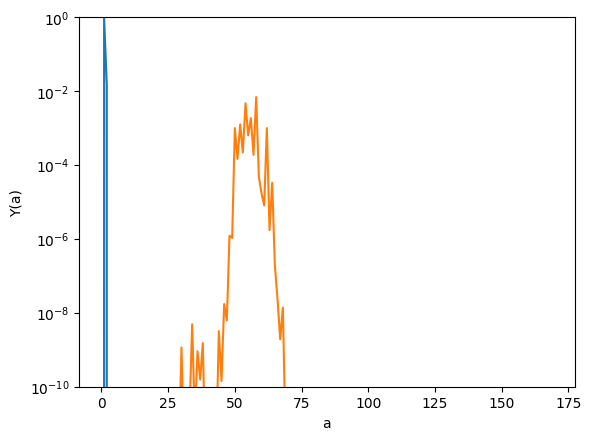

In [29]:
my_xml.plot_abundances_vs_nucleon_number(zone_xpath='[(position() = 1) or (position() = last())]', yscale = 'log', ylim = [1.e-10,1])

Use a list of plot parameters to label the steps and other keywords to give the plot the desired look:

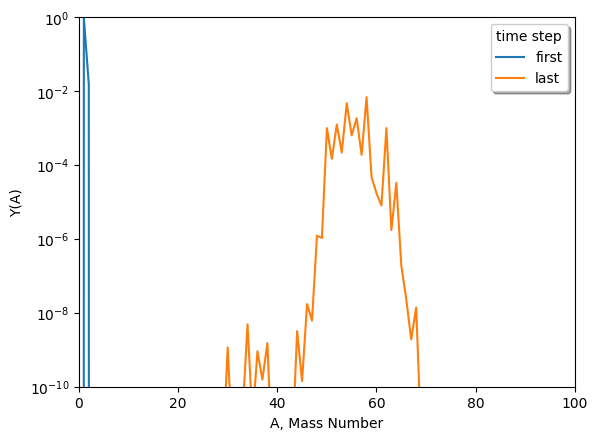

In [30]:
p_params = [{'label': 'first'}, {'label': 'last'}]
my_xml.plot_abundances_vs_nucleon_number(zone_xpath='[(position() = 1) or (position() = last())]', plotParams = p_params, yscale = 'log', ylim = [1.e-10,1], xlabel = 'A, Mass Number', ylabel = 'Y(A)', xlim = [0,100], legend = {'title': 'time step', 'shadow': True})

It is also possible to label the steps with the legend keyword. To do this:

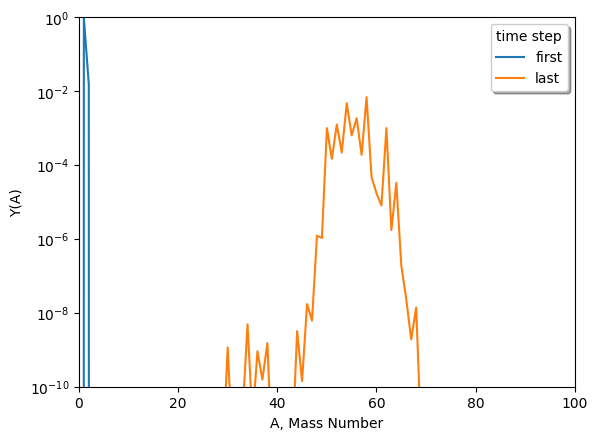

In [31]:
my_xml.plot_abundances_vs_nucleon_number(zone_xpath='[(position() = 1) or (position() = last())]', yscale = 'log', ylim = [1.e-10,1], xlabel = 'A, Mass Number', ylabel = 'Y(A)', xlim = [0,100], legend = (['first','last'], {'title': 'time step', 'shadow': True}))

You can save the figure as a file:

In [32]:
my_xml.plot_abundances_vs_nucleon_number(zone_xpath='[(position() = 1) or (position() = last())]', yscale = 'log', ylim = [1.e-10,1], xlabel = 'A, Mass Number', ylabel = 'Y(A)', xlim = [0,100], legend = (['first','last'], {'title': 'time step', 'shadow': True}), savefig = ('my_fig.png', {'bbox_inches': 'tight'}))

## Multi_XML 

To make plots from multiple webnucleo XML files, first import the namespace:

In [33]:
import wnutils.multi_xml as mx

Next, create an object for the files:

In [34]:
my_multi_xml = mx.Multi_Xml(['my_output1.xml', 'my_output2.xml'])

## Plot a property against a property in multiple files 

You can plot a property versus another property in multiple files. For example, to plot the t9 versus time in our two files:

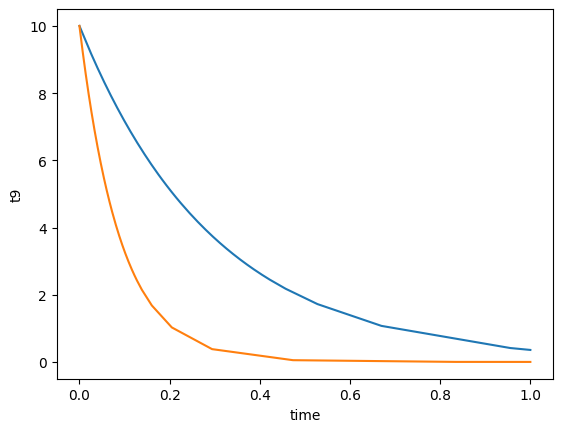

In [35]:
my_multi_xml.plot_property_vs_property('time','t9')

Since the calculations are for different exponential expansion timescales, you can label them with a legend. First, find the timescale by noting that ρ(t)=ρ(0)exp(−t/τ). This means that τ=−t /ln(ρ(t)/ρ(0)). Choose, say, step 150 to compute the tau for the two calcluations.

In [36]:
import math
xmls = my_multi_xml.get_xml()
p_params = []
for xml in xmls:
    props = xml.get_properties_as_floats(['time','rho'])
    tau = -props['time'][150] / math.log(props['rho'][150]/props['rho'][0])
    p_params.append({'label':('{:8.2f}'.format(tau)).strip() + 's'})

Now call the plot method with the plotParams keyword:

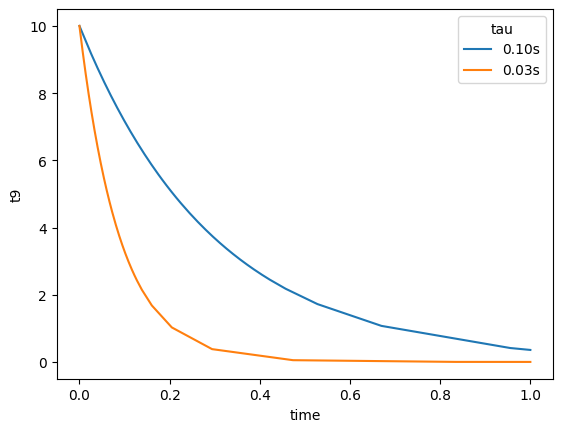

In [37]:
my_multi_xml.plot_property_vs_property('time','t9', plotParams = p_params, legend={'title':'tau'})

Notice the call to the legend keyword. The keyword values can be any valid keyword argument to **[matplotlib.pyplot.legend](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.legend.html#matplotlib.pyplot.legend)**. Thus, for example:

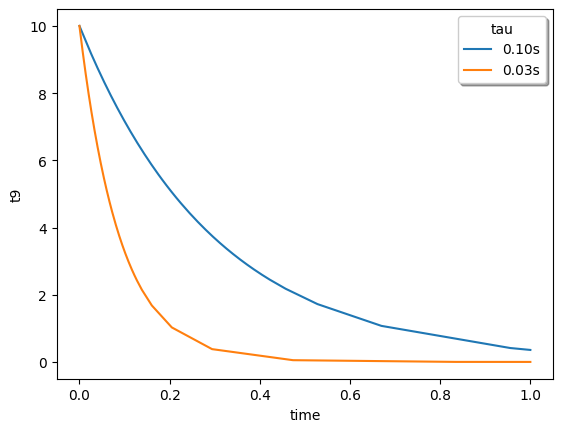

In [38]:
my_multi_xml.plot_property_vs_property('time','t9', plotParams = p_params, legend={'title':'tau', 'shadow':True})

## Plot a mass fraction against a property in multiple files 

You can also plot a mass fraction versus a property in multiple files. For example, to plot the mass fraction of fe58 as a function of time (and using the labels you defined above):

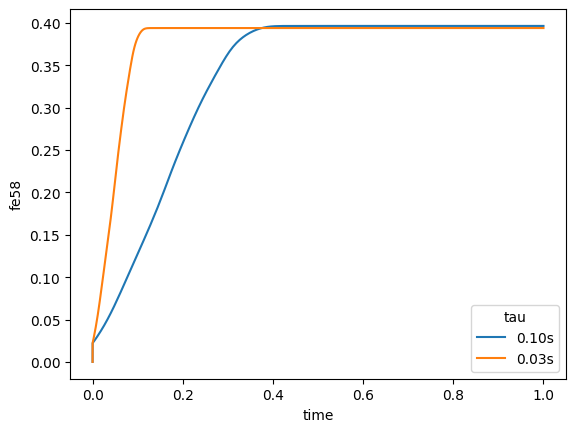

In [39]:
my_multi_xml.plot_mass_fraction_vs_property('time', 'fe58', plotParams = p_params, legend={'title':'tau'})

**[wnutils.multi_xml.Multi_Xml](https://wnutils.readthedocs.io/en/latest/wnutils.html#wnutils.multi_xml.Multi_Xml)** plotting methods accept valid *rcParams* and other keywords, as in the **[wnutils.xml.Xml](https://wnutils.readthedocs.io/en/latest/wnutils.html#wnutils.xml.Xml)** methods.

## H5 

To make plots from webnucleo HDF5 file, first import the namespace:

In [40]:
import wnutils.h5 as w5

Next, create an object for each file:

In [41]:
my_h5 = w5.H5('my_output1.h5')

## Plot a property versus a property for a given zone 

You can plot the values of two properties in all groups against each other for a given zone. For example, to plot *t9* versus *time* in the zone with labels *2, 0, 0*:

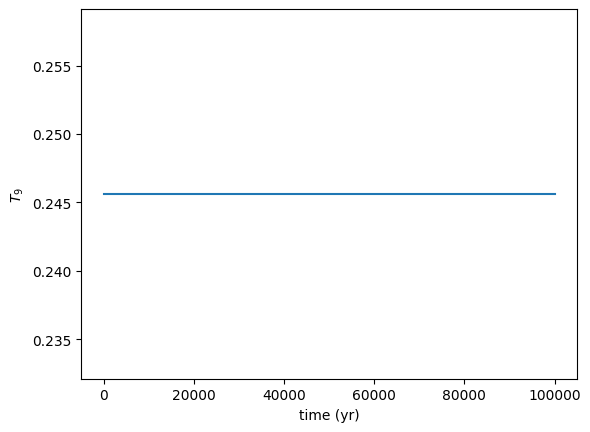

In [42]:
zone = ('2','0','0')
kws = {'xlabel': 'time (yr)', 'ylabel': '$T_9$'}
my_h5.plot_zone_property_vs_property(zone, 'time', 't9', xfactor=3.15e7, **kws)

In the calculation that gave the output in my_output1.h5, the temperature and density in zones were constant in time.

## Plot mass fractions versus a property for a given zone 

You can plot mass fractions against a property for a given zone. For example:

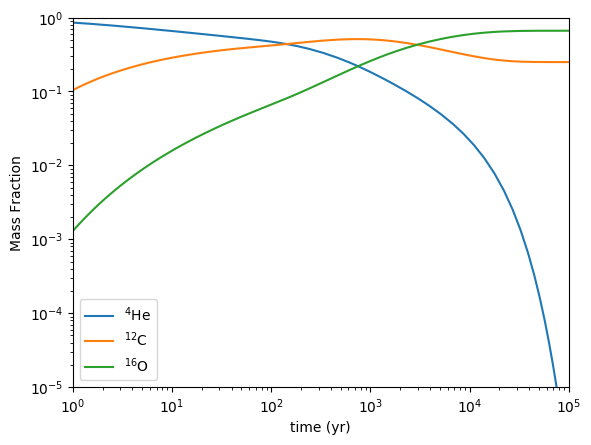

In [43]:
my_h5.plot_zone_mass_fractions_vs_property(('1','0','0'), 'time', ['he4', 'c12','o16'], yscale = 'log',ylim = [1.e-5,1], xscale = 'log', xlim = [1,1.e5], xfactor = 3.15e7,xlabel = 'time (yr)', use_latex_names=True)

Note, this is equivalent to:

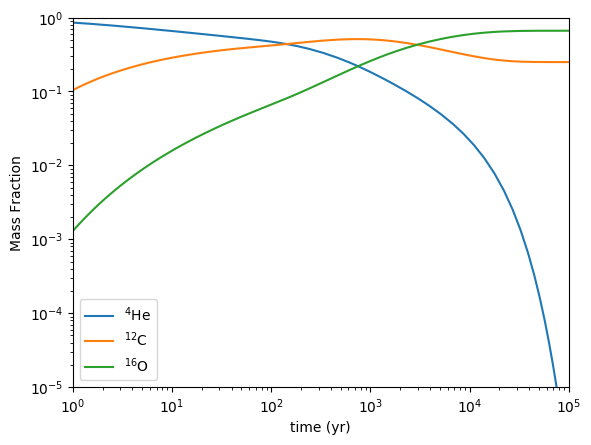

In [44]:
zone = ('1','0','0')
species = ['he4','c12','o16']
kwa = {'xlim': [1,1.e5], 'ylim': [1.e-5,1]}
kwb = {'xscale': 'log', 'yscale': 'log', 'xfactor': 3.15e7}
kwc = {'xlabel': 'time (yr)', 'use_latex_names': True}
my_h5.plot_zone_mass_fractions_vs_property( zone, 'time', species, **kwa, **kwb, **kwc)

Or, in Python 3.5 or greater:

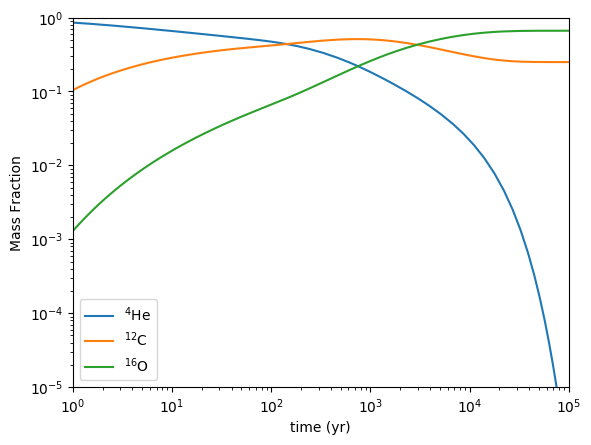

In [45]:
kws = {**kwa,**kwb,**kwc}
my_h5.plot_zone_mass_fractions_vs_property( zone, 'time', species, **kws)

## Plot a property in the zone of a given group

To plot a property in all the zones of a given group, say, Step number 125, you can:

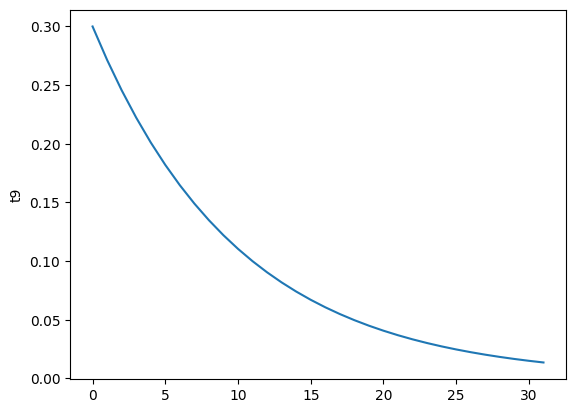

In [46]:
my_h5.plot_group_property_in_zones('Step 00125', 't9')

This shows the temperature (in billions of Kelvins) in the zones. The innermost (first) zone is the hottest.

## Plot mass fractions for a given group 

You can plot the mass fractions for a given group. The abscissa of the plot in this case will be a zone index. For example:

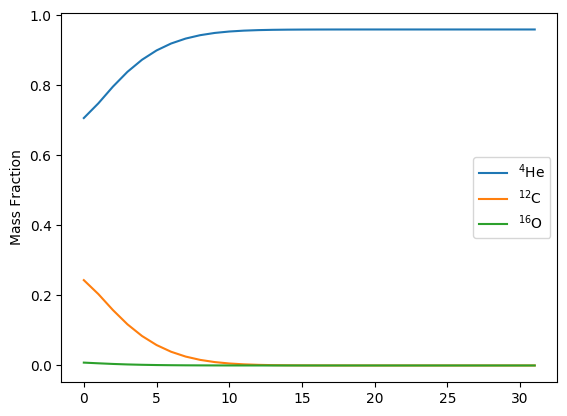

In [47]:
my_h5.plot_group_mass_fractions('Step 00125', ['he4', 'c12','o16'], use_latex_names=True)

## Plot group mass fractions versus a property 

In the previous example, you simply plotted the mass fractions against their zone. You can also plot against a zone property. For example:

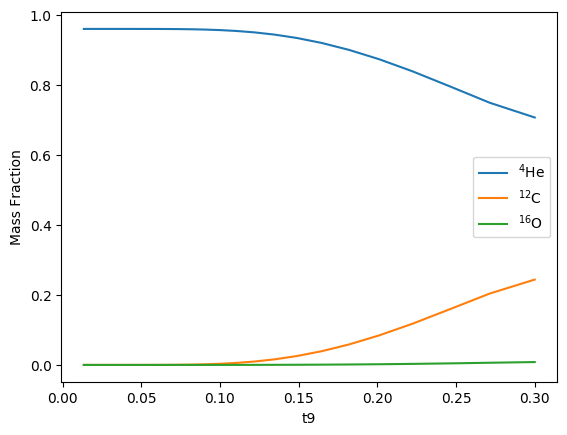

In [48]:
my_h5.plot_group_mass_fractions_vs_property('Step 00125', 't9', ['he4', 'c12','o16'], use_latex_names=True)

Notice that the plot shows the lowest temperature zone to the right part of the plot. To show the graph with the innermost (hottest) zones plotted to the right, use the *xlim* keyword:

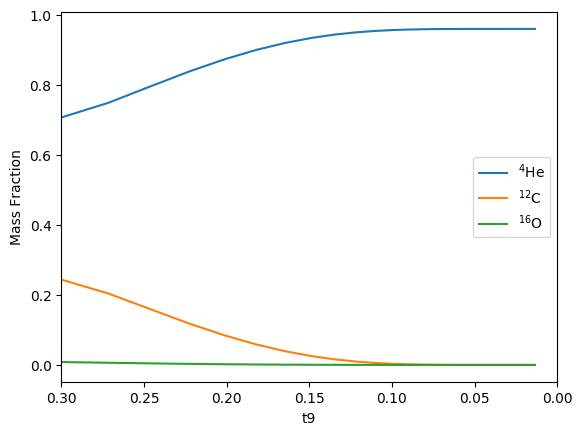

In [49]:
my_h5.plot_group_mass_fractions_vs_property('Step 00125', 't9', ['he4', 'c12','o16'], use_latex_names=True, xlim = [0.3,0])

## Multi_H5 

To make plots from multiple webnucleo HDF5 files, first import the namespace:

In [50]:
import wnutils.multi_h5 as m5

Next, create an object for the files:

In [51]:
my_multi_h5 = m5.Multi_H5(['my_output1.h5', 'my_output2.h5'])

## Plot a zone property against a property in multiple files 

You can plot a property versus another property in multiple files. For example, to plot the *neutron exposure* versus *time* in our two files:

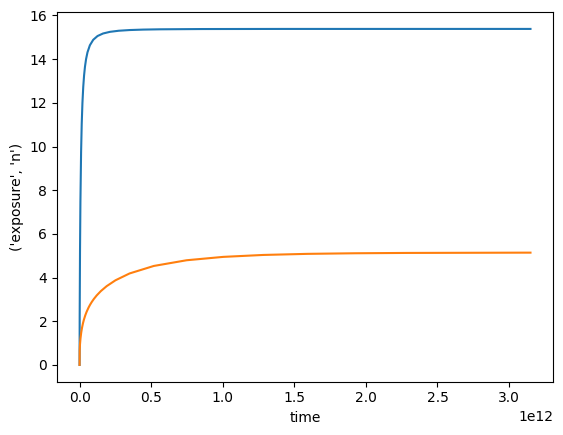

In [52]:
zone = ('0','0','0')
my_multi_h5.plot_zone_property_vs_property(zone, 'time',('exposure', 'n'))

Notice that the *neutron exposure* property is input as a tuple because, in this case, the property identifier has two parts: a *name* string (‘exposure’) and a *tag1* string (‘n’). As discussed in the Reading in the Data tutorial, a property can have a name and up to two tags; thus, the tuple identifying the property could have up to three elements. The neutron exposure is usually labeled *τn* and has units of *mb^−1*, that is, inverse [millibarns](https://en.wikipedia.org/wiki/Barn_(unit)). The difference in the two calculations is that the first was for a mixing timescale of 10^7 seconds while the second was for a mixing timescale of 10^9 seconds. We can thus add a legend:

In [53]:
p_params = [{'label':'$10^7\ s$', 'color':'black', 'linestyle':'-'}, {'label':'$10^9\ s$', 'color':'black', 'linestyle':':'}]

Now call the plot method with the plotParams keyword:

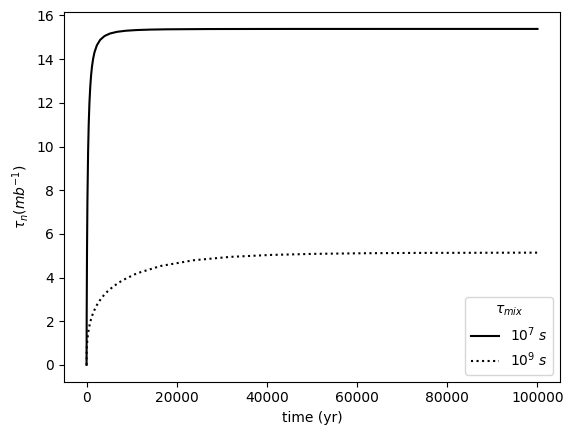

In [54]:
my_multi_h5.plot_zone_property_vs_property(zone, 'time',('exposure', 'n'), plotParams = p_params, legend={'title':'$\\tau_{mix}$'},xlabel='time (yr)', xfactor=3.15e7, ylabel='$\\tau_n(mb^{-1})$')

As with **[wnutils.multi_xml](https://wnutils.readthedocs.io/en/latest/wnutils.html#module-wnutils.multi_xml)**, the legend keyword values can be any valid keyword argument to **[matplotlib.pyplot.legend](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.legend.html#matplotlib.pyplot.legend)**. Thus, for example:

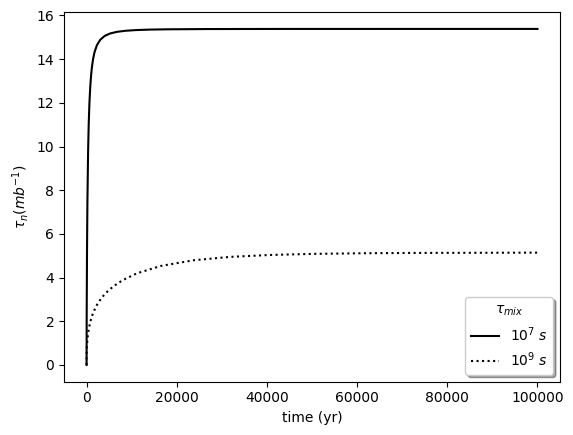

In [55]:
my_multi_h5.plot_zone_property_vs_property(zone, 'time',('exposure', 'n'), plotParams = p_params,legend={'title':'$\\tau_{mix}$', 'shadow':True},xlabel='time (yr)', xfactor=3.15e7, ylabel='$\\tau_n(mb^{-1})$')

## Plot a zone mass fraction against a property in multiple files 

You can also plot a mass fraction versus a property in multiple files. For example, to plot the mass fraction of fe56 as a function of time:

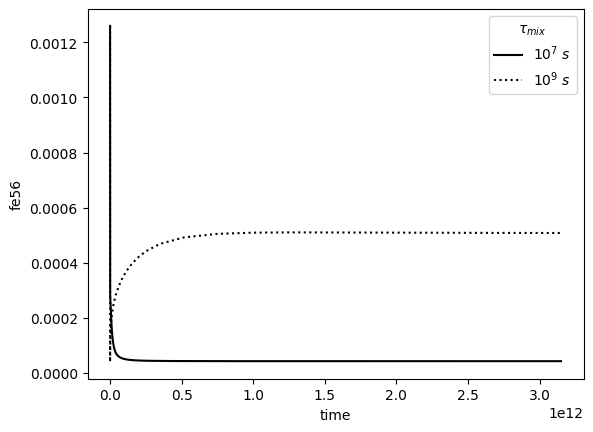

In [56]:
my_multi_h5.plot_zone_mass_fraction_vs_property(zone, 'time', 'fe56', plotParams = p_params, legend={'title':'$\\tau_{mix}$'})

**[wnutils.multi_h5.Multi_H5](https://wnutils.readthedocs.io/en/latest/wnutils.html#wnutils.multi_h5.Multi_H5)** plotting methods accept valid *rcParams* and other keywords, as in the **[wnutils.h5.H5](https://wnutils.readthedocs.io/en/latest/wnutils.html#wnutils.h5.H5)** methods.

For a tutorial on how to run the data, see the wnutils_make_plots_tutorial notebook. These tutorials can also be found on: https://wnutils.readthedocs.io/en/latest/tutorials.html